In [1]:
from astropy.cosmology import FlatwCDM
import wcosmo
import numpy as np
import matplotlib.pyplot as plt

In [14]:
Clight = 3e8
z_arr = np.linspace(0.0001,5,num=100)
H0_vals = [50,70,90]
Om_vals = [0.1,0.3,0.5,0.9]
colors = ['blue','orange','purple',"green"]
w_vals = [-2,-3/2,-1,-1/2,-1/3,0]

# Comparisons between `astropy.cosmology` and `wcosmo`

In [40]:
def absolute_comparison(func, H0_arr=H0_vals, Om_arr=Om_vals, w=-1, colors=colors, linestyles=["--","solid"], z_arr=z_arr):
    fig, axes = plt.subplots(nrows=1,ncols=2,sharex=True,sharey=True,figsize=(10,5))
    # axis 0: vary H0
    axes[0].set_title(f"Fix $\Omega_m=0.3$, $w={w}$, vary $H_0$")
    for H0, c in zip(H0_arr,colors):
        axes[0].plot(z_arr,wcosmo.FlatwCDM(H0=H0,Om0=0.3,w0=w).__getattribute__(func)(z_arr),ls=linestyles[0],lw=3,c=c)
        axes[0].plot(z_arr,FlatwCDM(H0=H0,Om0=0.3,w0=w).__getattribute__(func)(z_arr), color=c,ls=linestyles[1],label=f"$H_0=${H0} km/s/kpc")
    axes[0].plot([],c='k',ls=linestyles[1],label="astropy")
    axes[0].plot([],c='k',ls=linestyles[0],lw=3,label="wcosmo")
    axes[0].legend(ncol=2)
    axes[0].set_ylabel(" ".join(func.title().split("_")))

    # axis 1: vary Om0
    axes[1].set_title(f"Fix $H_0=70$, $w={w}$, vary $\Omega_m$")
    for Om, c in zip(Om_arr,colors):
        axes[1].plot(z_arr,wcosmo.FlatwCDM(H0=70,Om0=Om,w0=w).__getattribute__(func)(z_arr),ls=linestyles[0],lw=3,c=c)
        axes[1].plot(z_arr,FlatwCDM(H0=70,Om0=Om,w0=w).__getattribute__(func)(z_arr),color=c,ls=linestyles[1],label=f"$\Omega_m=${Om}")
    axes[1].plot([],c='k',ls=linestyles[1],label="astropy")
    axes[0].plot([],c='k',ls=linestyles[0],lw=3,label="wcosmo")
    axes[1].legend(ncol=2)

    for i in [0,1]:
        axes[i].set_xlabel("z")
    return fig


def fractional_comparison(func, H0_arr=H0_vals, Om_arr=Om_vals, w=-1, colors=colors, z_arr=z_arr):
    fig, axes = plt.subplots(nrows=1,ncols=2,sharex=True,sharey=False,figsize=(10,5))
    # axis 0: vary H0
    axes[0].set_title("Fix $\Omega_m=0.3$, $w=-1$, vary $H_0$")
    for H0, c in zip(H0_arr,colors):
        ap = FlatwCDM(H0=H0,Om0=0.3,w0=w).__getattribute__(func)(z_arr).value
        fracerr = (wcosmo.FlatwCDM(H0=H0,Om0=0.3,w0=w).__getattribute__(func)(z_arr)-ap)/ap
        axes[0].plot(z_arr,fracerr, c=c,label=f"$H_0=${H0} km/s/kpc")
    axes[0].legend(ncol=2)
    title = " ".join(func.split("_"))
    axes[0].set_ylabel("$\\frac{\\Delta \\text{%s}}{\\text{astropy %s}}$"%(title,title))

    # axis 1: vary Om0
    axes[1].set_title("Fix $H_0=70$, $w=-1$, vary $\Omega_m$")
    for Om, c in zip(Om_arr,colors):
        ap = FlatwCDM(H0=70,Om0=Om,w0=w).__getattribute__(func)(z_arr).value
        fracerr = (wcosmo.FlatwCDM(H0=70,Om0=Om,w0=w).__getattribute__(func)(z_arr)-ap)/ap
        axes[1].plot(z_arr,fracerr, c=c,label=f"$\Omega_m=${Om}")
    axes[1].set_yscale("log")
    for i in [0,1]:
        axes[i].set_xlabel("z")
    return fig

## $w=-1$
### luminosity distance

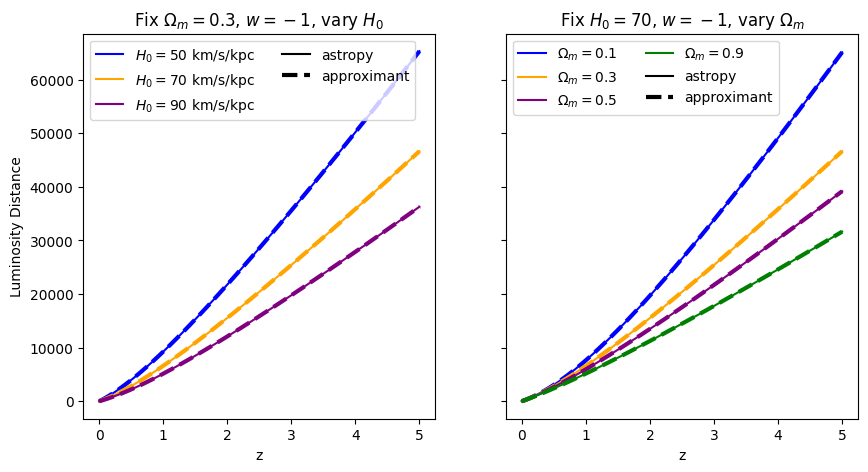

In [29]:
# luminosity distance
absolute_comparison("luminosity_distance");

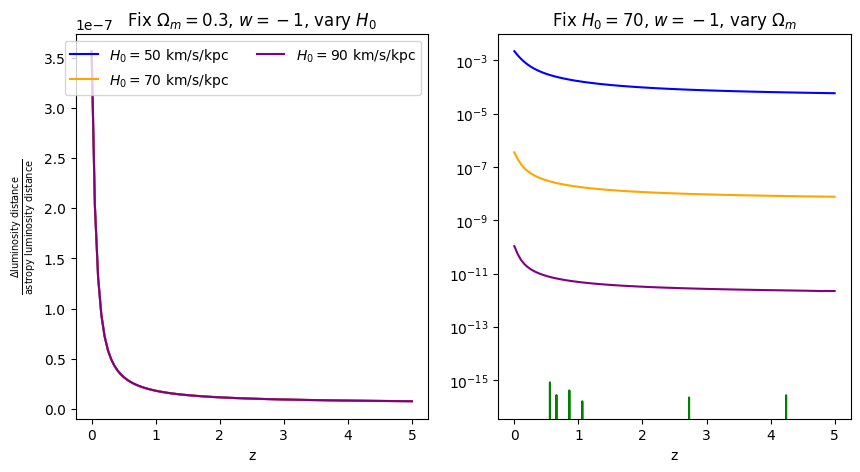

In [30]:
fractional_comparison("luminosity_distance");

### $\frac{dV_c}{dz}$: differential comoving volume

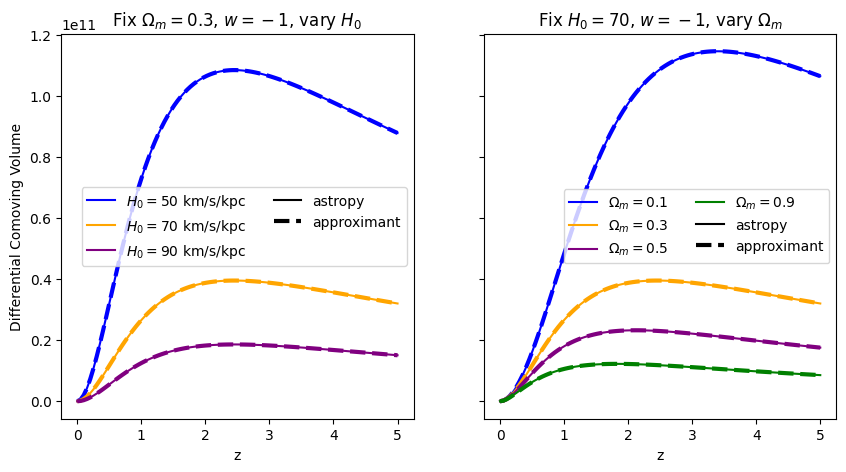

In [31]:
absolute_comparison("differential_comoving_volume");

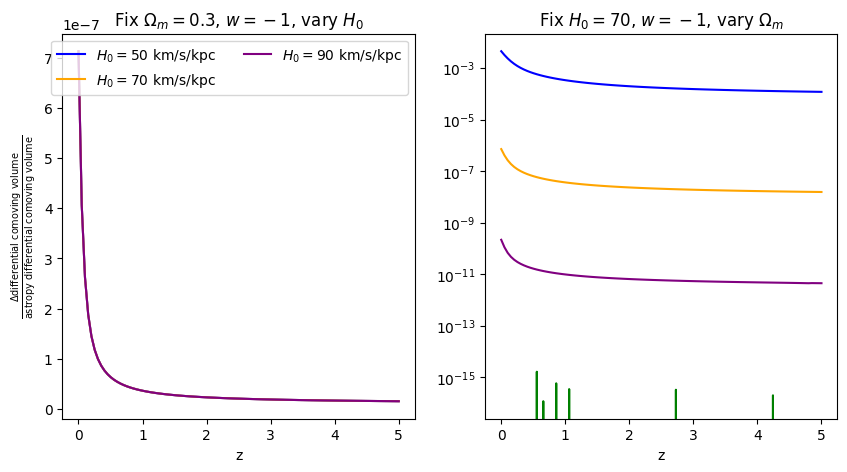

In [32]:
# fractional error in diff comov. vol
fractional_comparison("differential_comoving_volume");

### $\frac{d D_L}{dz}$: Jacobian between luminosity distance and redshift
Used commonly in GW data analysis

Text(0, 0.5, '$\\frac{dD_L}{dz} [Mpc]$')

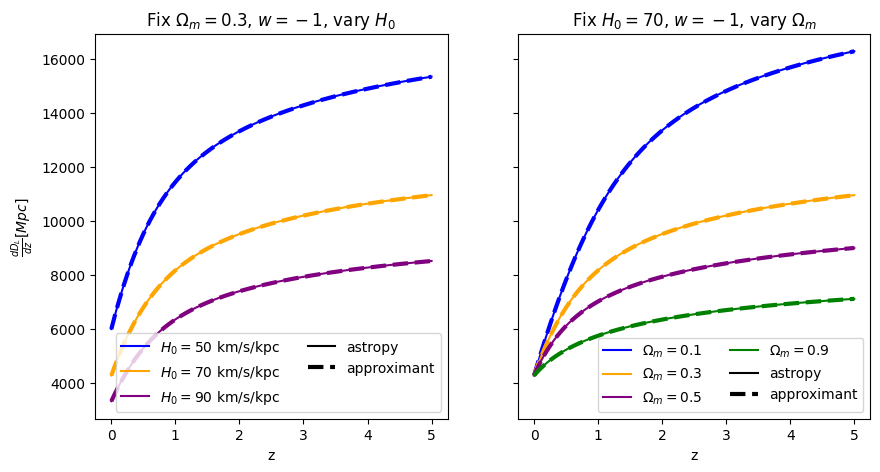

In [33]:
# Jacobian factor: ddL/dz

def dDL_dz(astropycosmo,z):
    dL = astropycosmo.luminosity_distance(z).value
    Ez_i = astropycosmo.inv_efunc(z)
    D_H = (Clight/1e3) / astropycosmo.H0.value
    return np.abs(dL/(1.+z) + (1.+z)*D_H * Ez_i)

fig, axes = plt.subplots(nrows=1,ncols=2,sharex=True,sharey=True,figsize=(10,5))
# axis 0: vary H0
axes[0].set_title("Fix $\Omega_m=0.3$, $w=-1$, vary $H_0$")
for H0, c in zip(H0_vals,colors):
    axes[0].plot(z_arr,wcosmo.FlatLambdaCDM(H0=H0,Om0=0.3).dDLdz(z_arr),ls="--",lw=3,c=c)
    axes[0].plot(z_arr,dDL_dz(FlatwCDM(H0=H0,Om0=0.3),z_arr), c=c,label=f"$H_0=${H0} km/s/kpc")
axes[0].plot([],c='k',label="astropy")
axes[0].plot([],c='k',ls="--",lw=3,label="approximant")
axes[0].legend(ncol=2)

# axis 1: vary Om0
axes[1].set_title("Fix $H_0=70$, $w=-1$, vary $\Omega_m$")
for Om, c in zip(Om_vals,colors):
    axes[1].plot(z_arr,wcosmo.FlatLambdaCDM(H0=70,Om0=Om).dDLdz(z_arr),ls="--",lw=3,c=c)
    axes[1].plot(z_arr,dDL_dz(FlatwCDM(H0=70,Om0=Om),z_arr), c=c,label=f"$\Omega_m=${Om}")
axes[1].plot([],c='k',label="astropy")
axes[1].plot([],c='k',ls="--",lw=3,label="approximant")
axes[1].legend(ncol=2)

for i in [0,1]:
    axes[i].set_xlabel("z")
axes[0].set_ylabel("$\\frac{dD_L}{dz} [Mpc]$")

## $w\neq-1$

The new taylor expansion is:
\begin{equation}
F = \sqrt{a} \sum_{n=0}^{\infty}{-1/2 \choose n} \frac{x^n}{1/2-3wn}
\end{equation}

### Luminosity distance

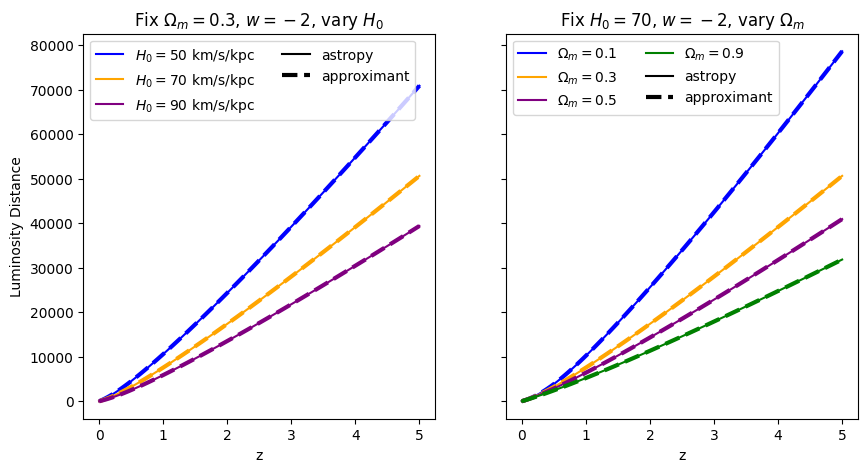

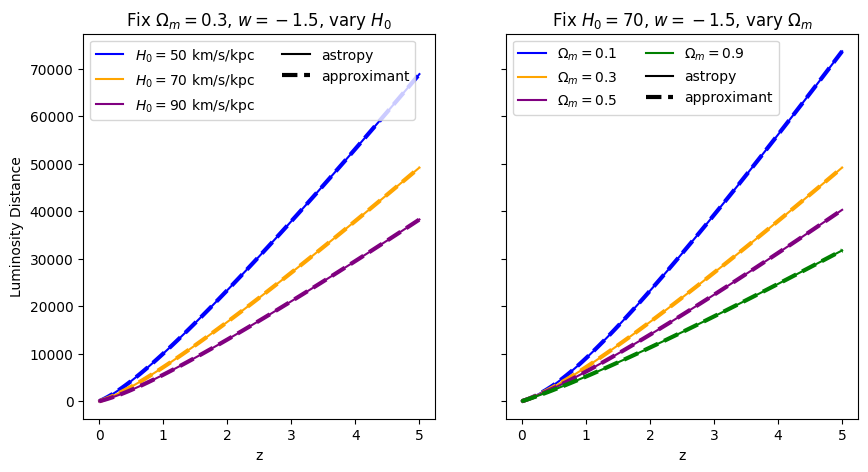

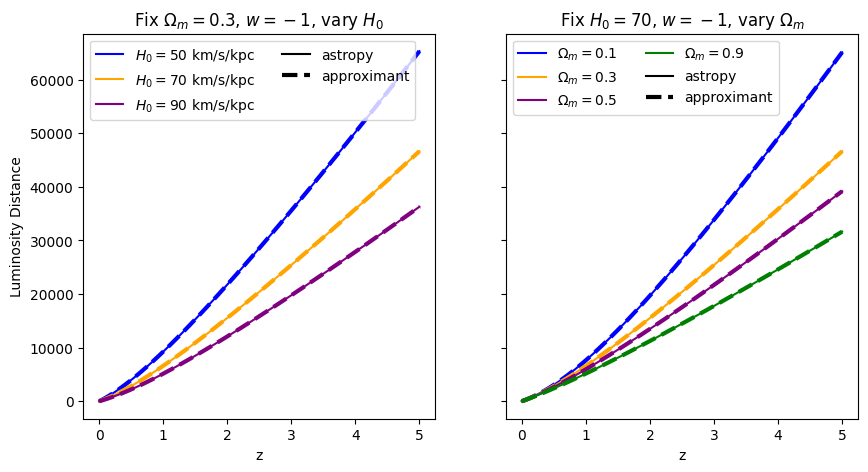

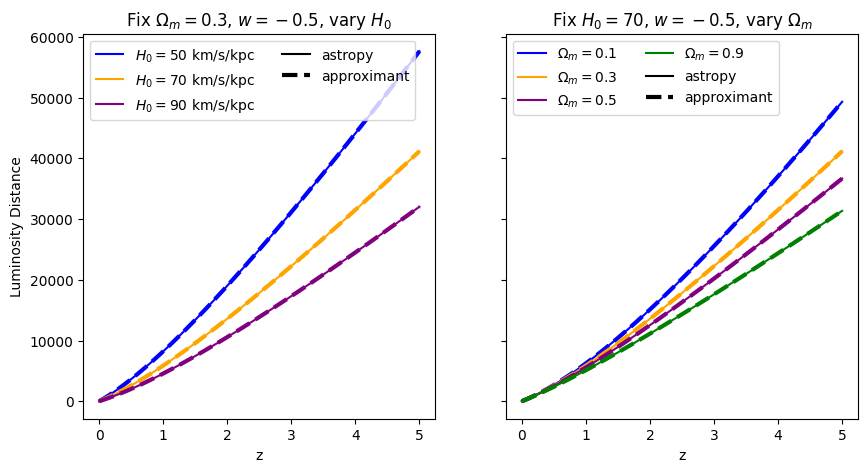

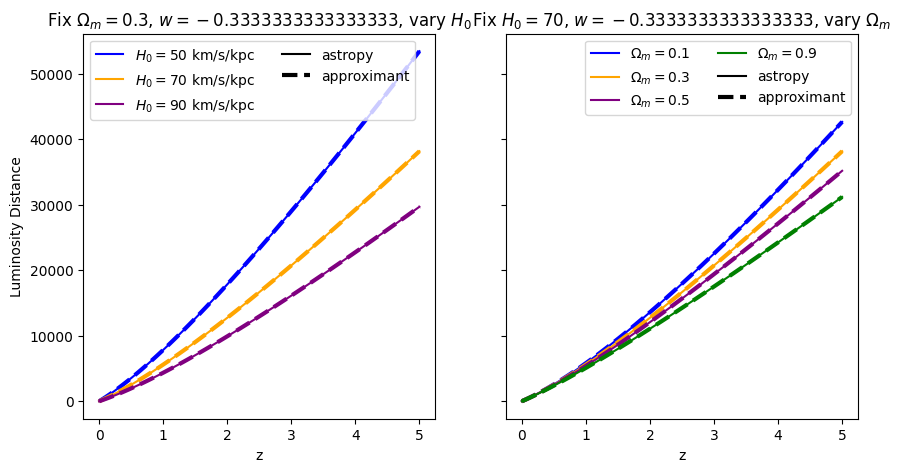

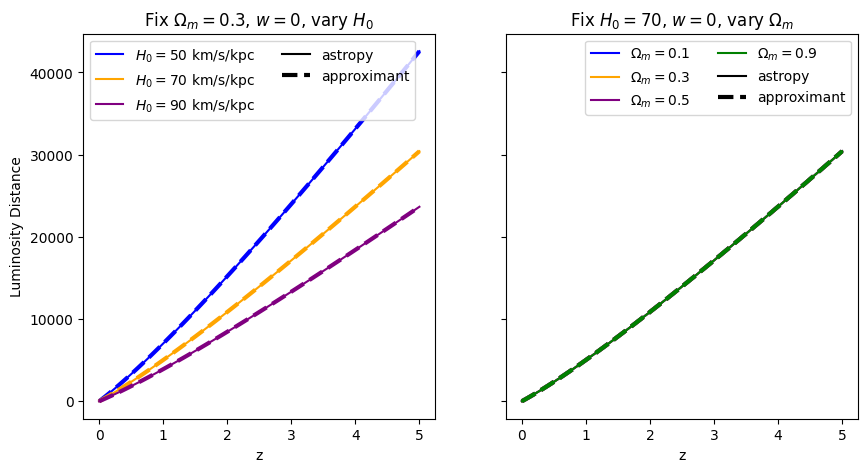

In [36]:
for w in w_vals:
    absolute_comparison("luminosity_distance",w=w)

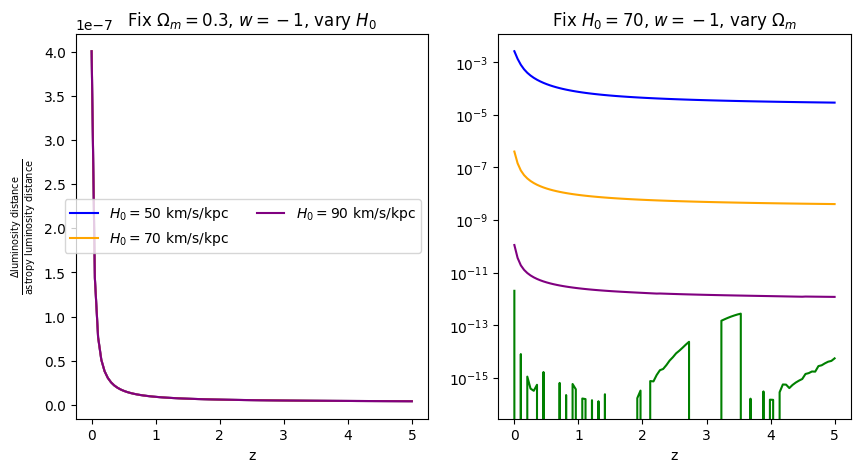

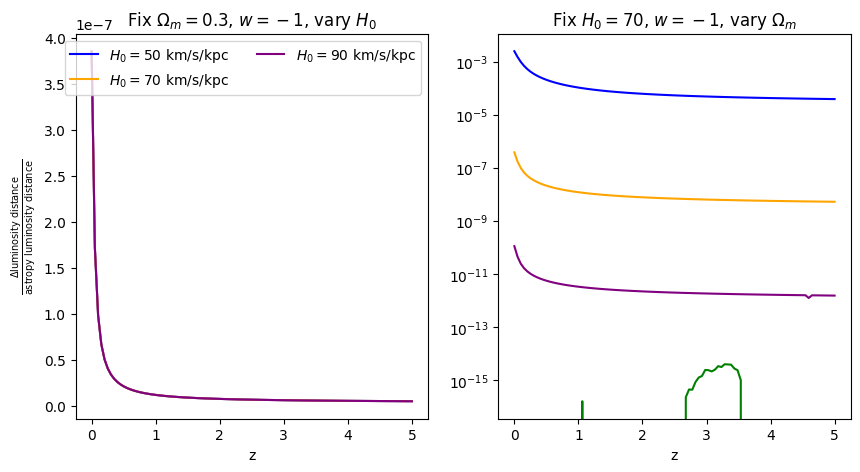

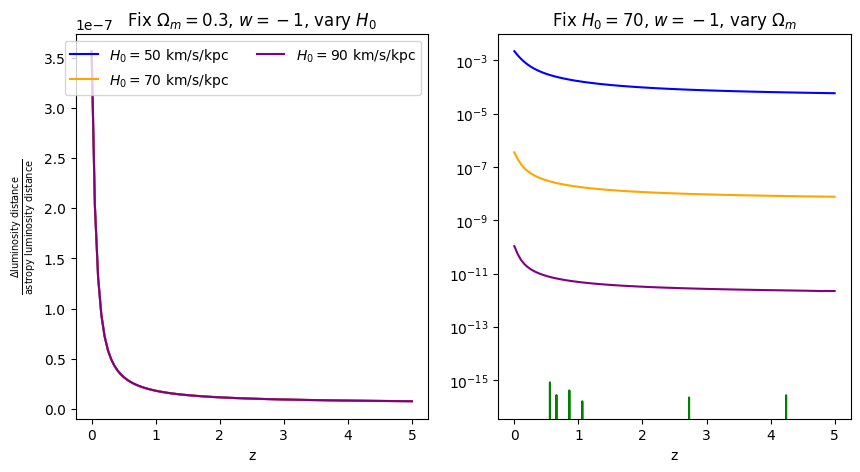

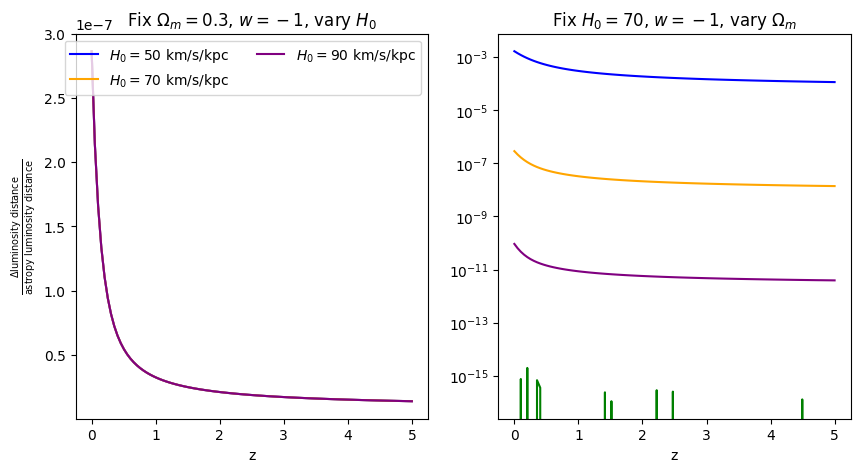

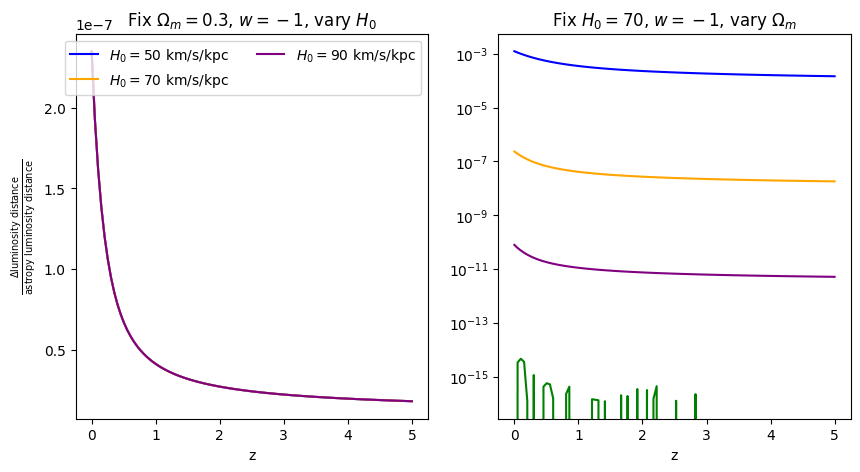

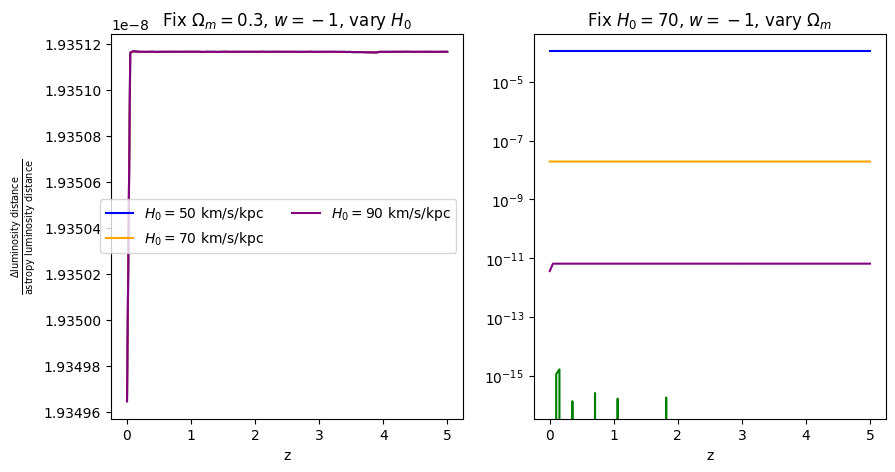

In [37]:
for w in w_vals:
    fractional_comparison("luminosity_distance",w=w)

### $\frac{dV_c}{dz}$: differential comoving volume

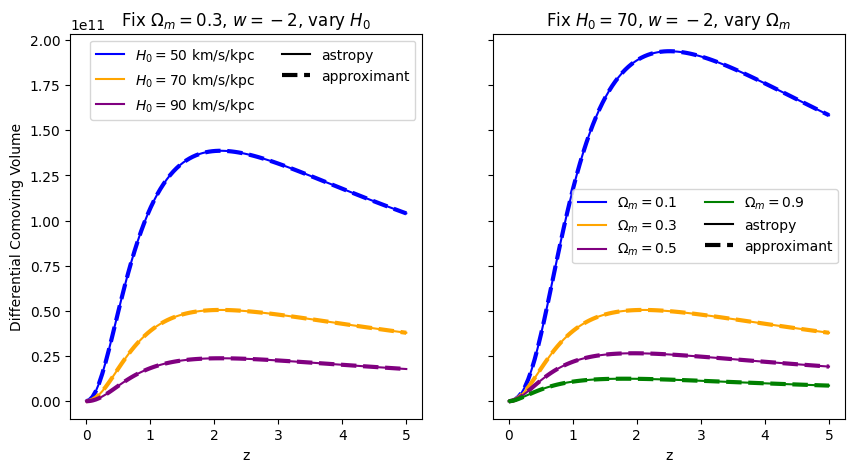

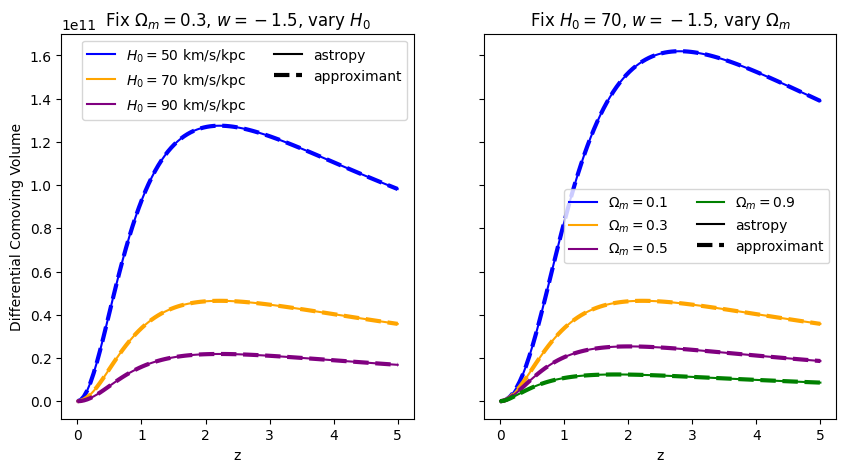

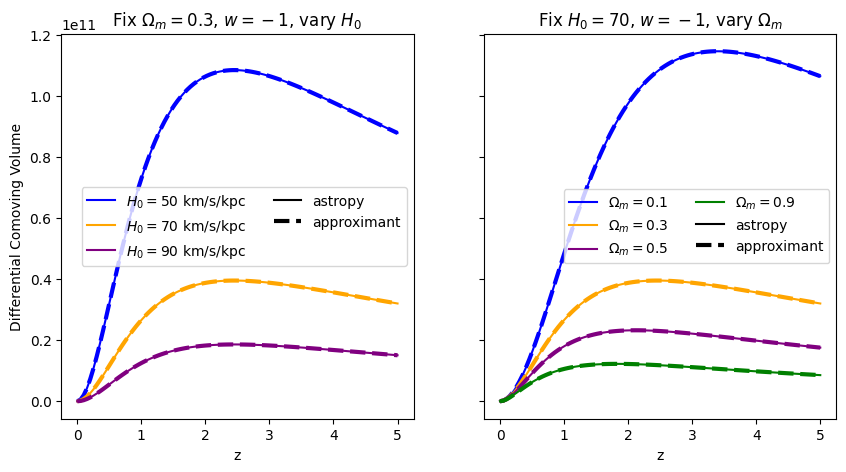

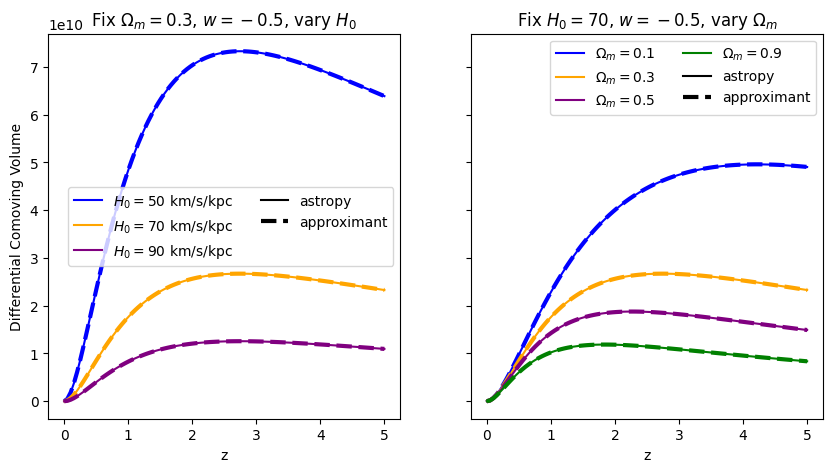

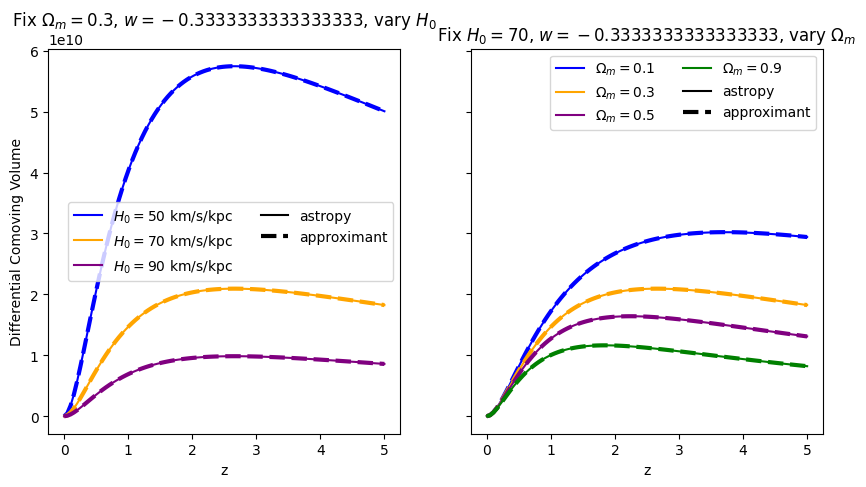

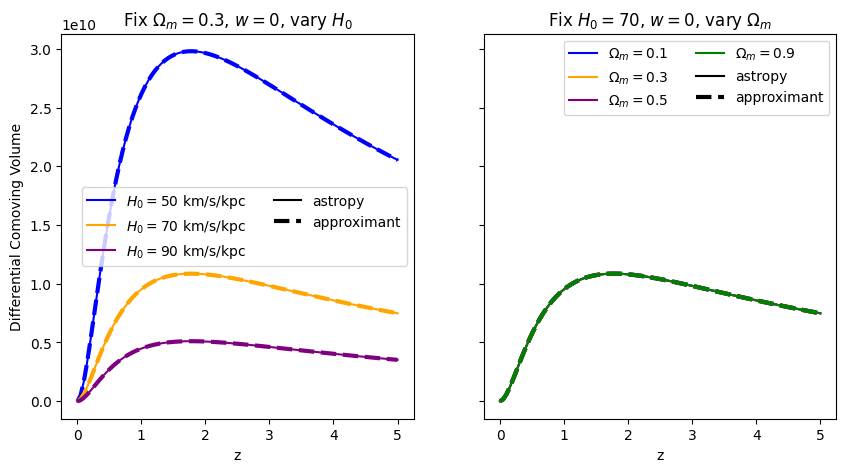

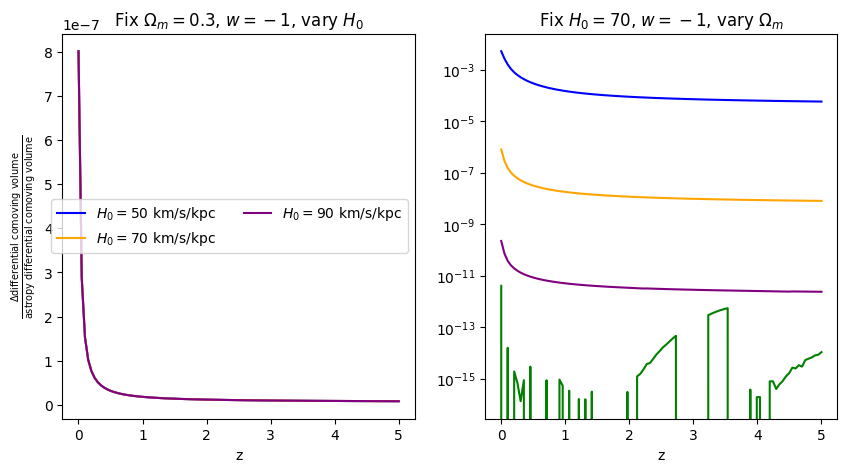

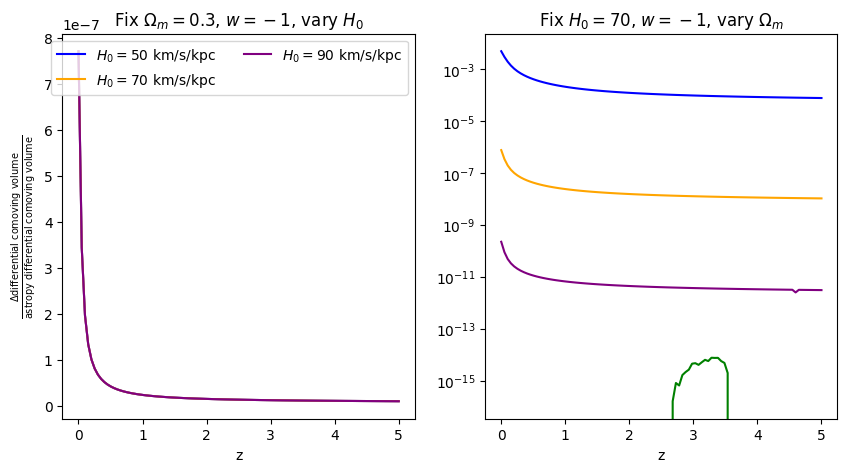

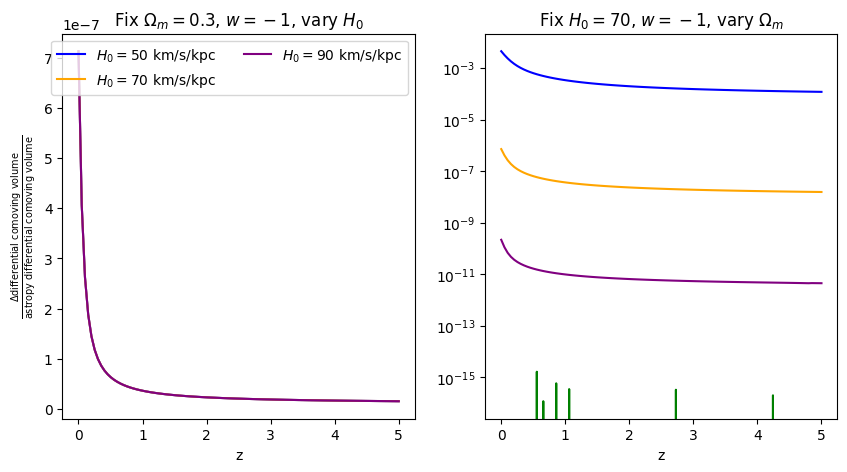

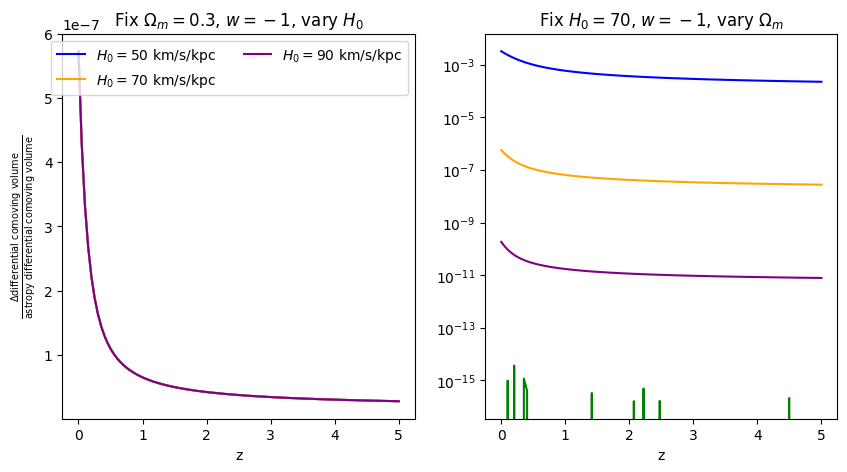

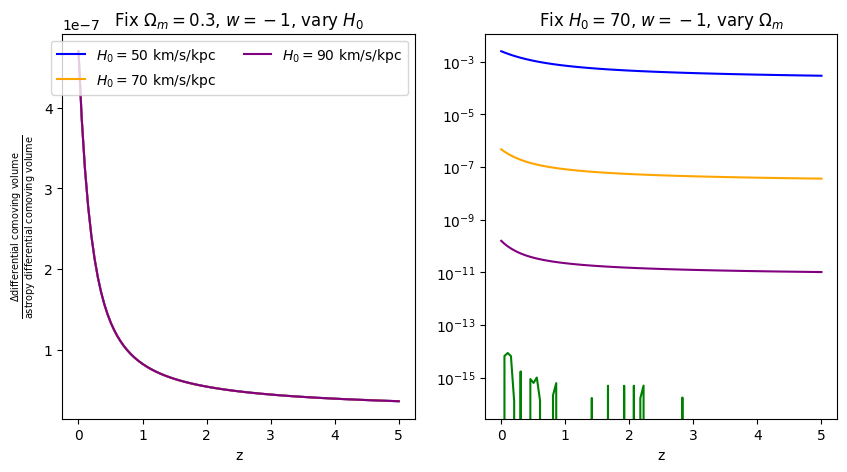

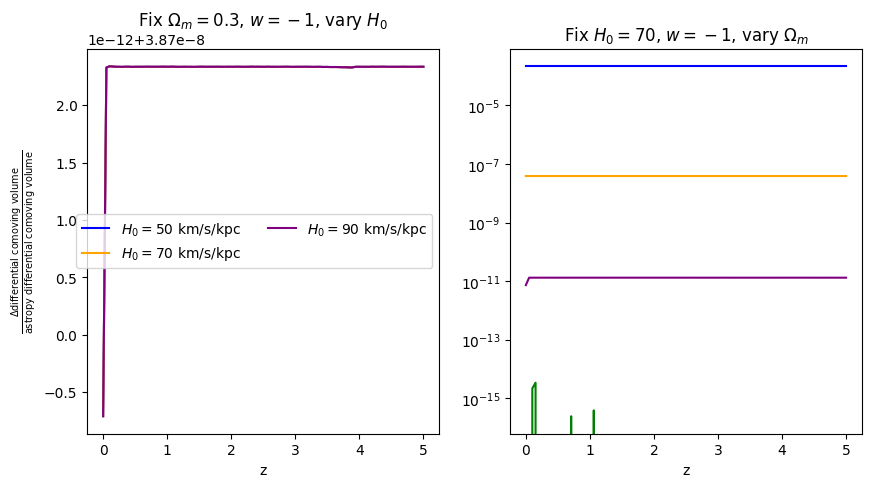

In [38]:
for w in w_vals:
    f=absolute_comparison("differential_comoving_volume",w=w)
for w in w_vals:
    f=fractional_comparison("differential_comoving_volume",w=w)


# Comparisons between Adachi & Kasai 2011, `astropy`, and `wcosmo`

In [50]:
# Adachi and Kasai functions
def Phi(x):
    num = 1 + 1.320*x + 0.4415* np.power(x,2) + 0.02656*np.power(x,3)
    den = 1 + 1.392*x + 0.5121* np.power(x,2) + 0.03944*np.power(x,3)
    return num/den
def xx(z,Om0):
    return (1.0-Om0)/Om0/np.power(1.0+z,3)
def Ez_inv(z,Om0):
    return 1./np.sqrt((1.-Om0) + Om0*np.power((1.+z),3))

def dL_approx(z,H0,Om0,w=-1): # add "w" so passing w doesn't throw and error but also does nothing
    if w != -1:
        print("Warning! w != -1 was passed but has no effect")
    D_H = (Clight/1.0e3)  / H0 #Mpc
    return 2.*D_H * (1.+z) * (Phi(xx(0.,Om0)) - Phi(xx(z,Om0))/np.sqrt(1.+z))/np.sqrt(Om0)

def dDLdz_approx(z, H0, Om0,w=-1):
    if w != -1:
        print("Warning! w != -1 was passed but has no effect")
    dL = dL_approx(z,H0,Om0)#Mpc
    Ez_i = Ez_inv(z,Om0)
    D_H = (Clight/1e3) / H0 #Mpc
    return np.abs(dL/(1.+z) + (1.+z)*D_H * Ez_i)

def diff_comoving_volume_approx(z,H0,Om0,w=-1):
    if w != -1:
        print("Warning! w != -1 was passed but has no effect")
    dL = dL_approx(z,H0,Om0) #Mpc
    Ez_i = Ez_inv(z,Om0)
    D_H = (Clight/1e3)  / H0 #Mpc
    return np.power(dL,2) * D_H * Ez_i / np.power(1.+z,2.)

In [100]:
# with w != -1
# similar to what is implemented in wcosmo, but with the same number of terms as in Adachi & Kasai 2011
def Phi_w(x,w):
    num = 2 * (64 + 80*x + 24*x**2 + x**3 - 24 * w * (624 + 760 * x + 222*x**2 + 9*x**3) + 
    144 * w**2 * (11920 + 14560 * x + 4278*x**2 + 175*x**3) - 
    1728 * w**3 * (71672 + 87840 * x + 25791*x**2 + 1049*x**3) + 
    2592 * w**4 * (2356832 + 2882800 * x + 839268*x**2 + 33719*x**3) - 
    62208 * w**5 * (3445928 + 4201240 * x + 1212453*x**2 + 48254*x**3) + 
    313456656384 * w**12 * (3319040 + 4519200 * x + 1598688*x**2 + 
       111783*x**3) + 
    186624 * w**6 * (29448112 + 35918800 * x + 10359714*x**2 + 413179*x**3) - 
    17414258688 * w**11 * (30788544 + 38850120 * x + 11816424*x**2 + 
       495569*x**3) - 
    2239488 * w**7 * (46909544 + 57549840 * x + 16745037*x**2 + 668609*x**3) + 
    1934917632 * w**10 * (61958336 + 76676430 * x + 22483512*x**2 + 
       837203*x**3) - 
    120932352 * w**9 * (133531520 + 165267720 * x + 48520736*x**2 + 
       1828153*x**3) + 
    1679616 * w**8 * (900485632 + 1112477520 * x + 326613696*x**2 + 
       12787417*x**3))
    den = (-1 + 6 * w) * (-1 + 12 * w) * (-1 + 18 * w) * (64 + 112 * x + 56 * x**2 + 7 * x**3 - 
   12*w * (1056 + 1792 * x + 868 * x**2 + 105 * x**3) + 
   36*w**2 * (34304 + 58128 * x + 28336 * x**2 + 3479 * x**3) - 
   432*w**3 * (171968 + 288960 * x + 139552 * x**2 + 16891 * x**3) - 
   241864704*w**9 * (3319040 + 4519200 * x + 1598688 * x**2 + 111783 * x**3) + 
   1296*w**4 * (2260032 + 3729936 * x + 1763944 * x**2 + 209097 * x**3) - 
   3919104*w**7 * (4782720 + 7538144 * x + 3394704 * x**2 + 391167 * x**3) - 
   15552*w**5 * (5009056 + 8107680 * x + 3754156 * x**2 + 439439 * x**3) + 
   6718464*w**8 * (25067648 + 37946160 * x + 15870960 * x**2 + 1547889 * x**3) + 
   46656*w**6 * (30759808 + 49091504 * x + 22480304 * x**2 + 2667861 * x**3))
    return -1*num/den

def xx_w(z,Om0,w):
    return (1.0-Om0)/Om0/np.power(1.0+z,-3*w)

def Ez_inv_w(z,Om0,w):
    return 1./np.sqrt((1.-Om0)*np.power((1.+z),3*(1+w)) + Om0*np.power((1.+z),3))

def dL_approx_w(z,H0,Om0,w):
    D_H = (Clight/1.0e3)  / H0 #Mpc
    return D_H * (1.+z) * (Phi_w(xx_w(0.,Om0,w),w) - Phi_w(xx_w(z,Om0,w),w)/np.sqrt(1.+z))/np.sqrt(Om0)

def diff_comoving_volume_approx_w(z,H0,Om0,w):
    dL = dL_approx_w(z,H0,Om0,w) #Mpc
    Ez_i = Ez_inv_w(z,Om0,w)
    D_H = (Clight/1e3)  / H0 #Mpc
    return np.power(dL,2) * D_H * Ez_i / np.power(1.+z,2.)


In [102]:
# plotting functions
def absolute_comparison_ak(func, H0_arr=H0_vals, Om_arr=Om_vals, w=-1, colors=colors, linestyles=["--","solid",":"], z_arr=z_arr):
    # map to AK11-like function
    # we change functions depending on the value of w so we can be sure we are making a direct comparison with AK11 when using w=-1
    if w==-1:
        func_map = dict(luminosity_distance=dL_approx,
                        differential_comoving_volume=diff_comoving_volume_approx)
    else:
        func_map = dict(luminosity_distance=dL_approx_w,
                        differential_comoving_volume=diff_comoving_volume_approx_w)
    
    fig, axes = plt.subplots(nrows=1,ncols=2,sharex=True,sharey=True,figsize=(10,5))
    # axis 0: vary H0
    axes[0].set_title(f"Fix $\Omega_m=0.3$, $w={w}$, vary $H_0$")
    for H0, c in zip(H0_arr,colors):
        axes[0].plot(z_arr,wcosmo.FlatwCDM(H0=H0,Om0=0.3,w0=w).__getattribute__(func)(z_arr),ls=linestyles[0],alpha=0.5,lw=3,c=c)
        axes[0].plot(z_arr,FlatwCDM(H0=H0,Om0=0.3,w0=w).__getattribute__(func)(z_arr), color=c,ls=linestyles[1],alpha=0.5,label=f"$H_0=${H0} km/s/kpc")
        axes[0].plot(z_arr,func_map[func](z_arr,H0=H0,Om0=0.3,w=w),color=c,ls=linestyles[2],alpha=0.5)
    axes[0].plot([],c='k',ls=linestyles[1],label="astropy")
    axes[0].plot([],c='k',ls=linestyles[0],lw=3,label="wcosmo")
    axes[0].plot([],c='k',ls=linestyles[2],lw=3,label="AK11")
    axes[0].legend(ncol=2)
    

    # axis 1: vary Om0
    axes[1].set_title(f"Fix $H_0=70$, $w={w}$, vary $\Omega_m$")
    for Om, c in zip(Om_arr,colors):
        axes[1].plot(z_arr,wcosmo.FlatwCDM(H0=70,Om0=Om,w0=w).__getattribute__(func)(z_arr), alpha=0.5, ls=linestyles[0],lw=3,c=c)
        axes[1].plot(z_arr,FlatwCDM(H0=70,Om0=Om,w0=w).__getattribute__(func)(z_arr),color=c, alpha=0.5, ls=linestyles[1],label=f"$\Omega_m=${Om}")
        axes[1].plot(z_arr,func_map[func](z_arr,H0=70,Om0=Om,w=w),color=c, alpha=0.5, ls=linestyles[2])
    axes[0].plot([],c='k',ls=linestyles[1], alpha=0.5, label="astropy")
    axes[0].plot([],c='k',ls=linestyles[0], alpha=0.5, lw=3, label="wcosmo")
    axes[0].plot([],c='k',ls=linestyles[2], alpha=0.5, lw=3, label="AK11")
    axes[1].legend(ncol=2)

    axes[0].set_ylabel(" ".join(func.title().split("_")))
    for i in [0,1]:
        axes[i].set_xlabel("z")
    return fig


def fractional_comparison_ak(func, H0_arr=H0_vals, Om_arr=Om_vals, w=-1, colors=colors, linestyles=["solid",":","-."],z_arr=z_arr):
    # we do this so we can be sure we are making a direct comparison with AK11 when using w=-1
    if w==-1:
        func_map = dict(luminosity_distance=dL_approx,
                        differential_comoving_volume=diff_comoving_volume_approx)
    else:
        func_map = dict(luminosity_distance=dL_approx_w,
                        differential_comoving_volume=diff_comoving_volume_approx_w)
    
    
    fig, axes = plt.subplots(nrows=1,ncols=2,sharex=True,sharey=False,figsize=(10,5))
    # axis 0: vary H0
    axes[0].set_title("Fix $\Omega_m=0.3$, $w=-1$, vary $H_0$")
    for H0, c in zip(H0_arr,colors):
        ap = FlatwCDM(H0=H0,Om0=0.3,w0=w).__getattribute__(func)(z_arr).value
        wcos = wcosmo.FlatwCDM(H0=H0,Om0=0.3,w0=w).__getattribute__(func)(z_arr)
        ak = func_map[func](z_arr,H0=H0,Om0=0.3,w=w)
        fracerr_ap_wcosmo = (wcos-ap)/ap
        fracerr_ap_ak = (ak-ap)/ap
        fracerr_ak_wcosmo = (wcos-ak)/ak
        
        axes[0].plot(z_arr,fracerr_ap_wcosmo, ls=linestyles[0], c=c, alpha=0.5,label=f"$H_0=${H0} km/s/kpc")
        axes[0].plot(z_arr,fracerr_ap_ak, ls=linestyles[1], c=c, alpha=0.5)
        axes[0].plot(z_arr,fracerr_ak_wcosmo, ls=linestyles[2], c=c, alpha=0.5)

    axes[0].plot([],c='k',ls=linestyles[0],lw=3,label="astropy vs wcosmo")
    axes[0].plot([],c='k',ls=linestyles[1],lw=3,label="astropy vs AK11")
    axes[0].plot([],c='k',ls=linestyles[2],lw=1.5,label="AK11 vs wcosmo")
    axes[0].legend(ncol=2)

    # axis 1: vary Om0
    axes[1].set_title("Fix $H_0=70$, $w=-1$, vary $\Omega_m$")
    for Om, c in zip(Om_arr,colors):
        ap = FlatwCDM(H0=70,Om0=Om,w0=w).__getattribute__(func)(z_arr).value
        wcos = wcosmo.FlatwCDM(H0=70,Om0=Om,w0=w).__getattribute__(func)(z_arr)
        ak = func_map[func](z_arr,H0=70,Om0=Om,w=w)
        fracerr_ap_wcosmo = (wcos-ap)/ap
        fracerr_ap_ak = (ak-ap)/ap
        fracerr_ak_wcosmo = (wcos-ak)/ak
        
        axes[1].plot(z_arr,fracerr_ap_wcosmo, ls=linestyles[0], c=c, alpha=0.5, label=f"$\Omega_m=${Om}")
        axes[1].plot(z_arr,fracerr_ap_ak, ls=linestyles[1], c=c, alpha=0.5)
        axes[1].plot(z_arr,fracerr_ak_wcosmo, ls=linestyles[2], lw=3, c=c, alpha=0.5)
    axes[1].set_yscale("log")
    axes[1].plot([],c='k',ls=linestyles[0],lw=3,label="astropy vs wcosmo")
    axes[1].plot([],c='k',ls=linestyles[1],lw=3,label="astropy vs AK11")
    axes[1].plot([],c='k',ls=linestyles[2],lw=1.5,label="AK11 vs wcosmo")
    axes[1].legend(ncol=2)
    
    title = " ".join(func.split("_"))
    axes[0].set_ylabel("$\\frac{\\Delta \\text{%s}}{\\text{astropy %s}}$"%(title,title))
    for i in [0,1]:
        axes[i].set_xlabel("z")
    return fig

## $w=-1$

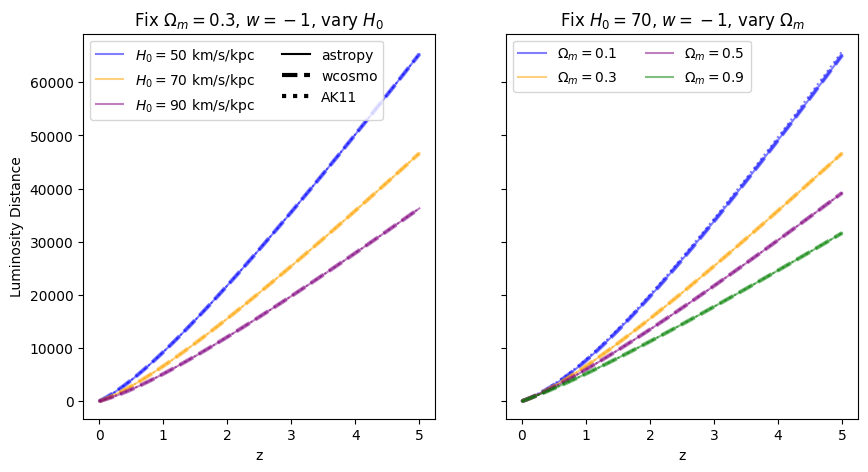

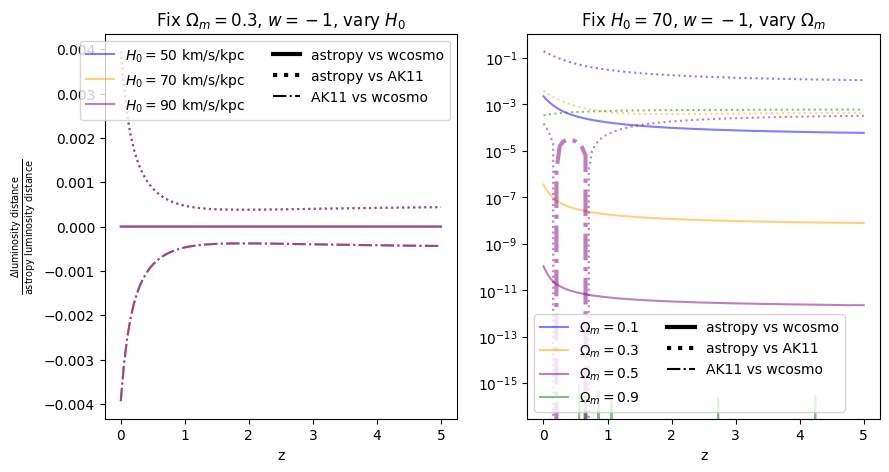

In [103]:
absolute_comparison_ak("luminosity_distance");
fractional_comparison_ak("luminosity_distance");

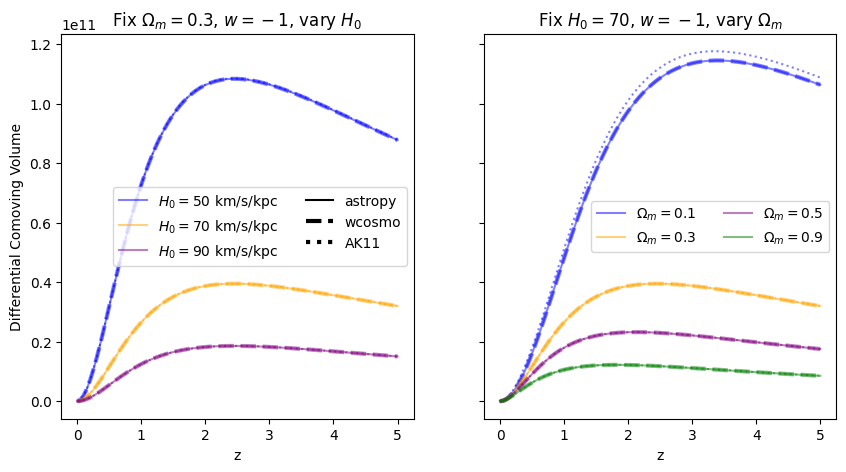

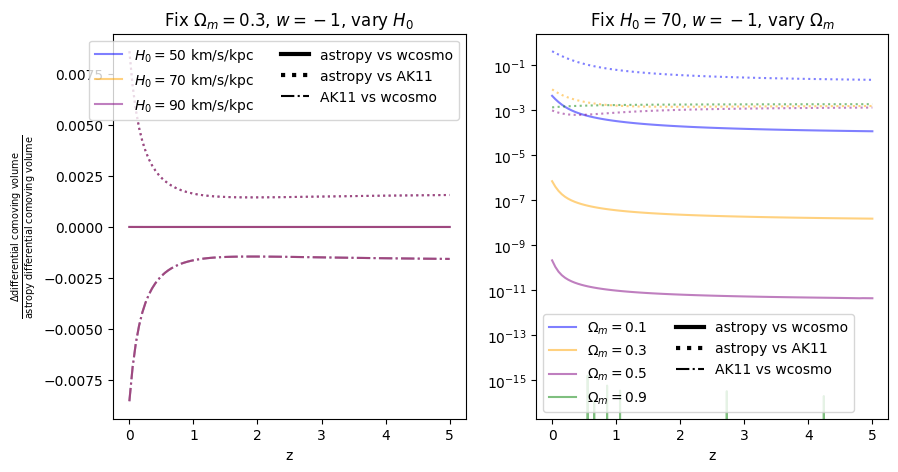

In [104]:
absolute_comparison_ak("differential_comoving_volume");
fractional_comparison_ak("differential_comoving_volume");

## $w\neq -1$

### Luminosity distance

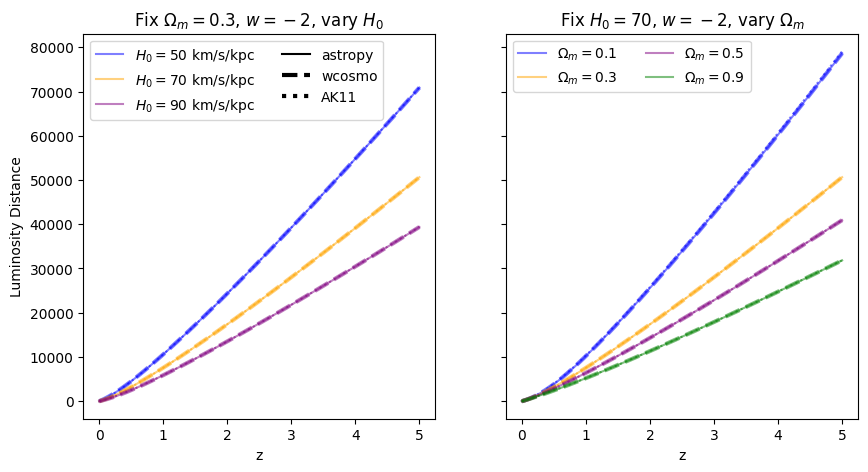

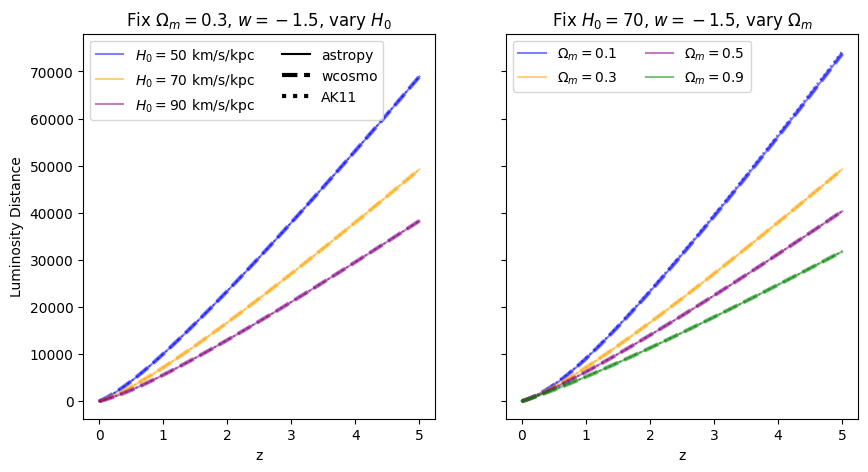

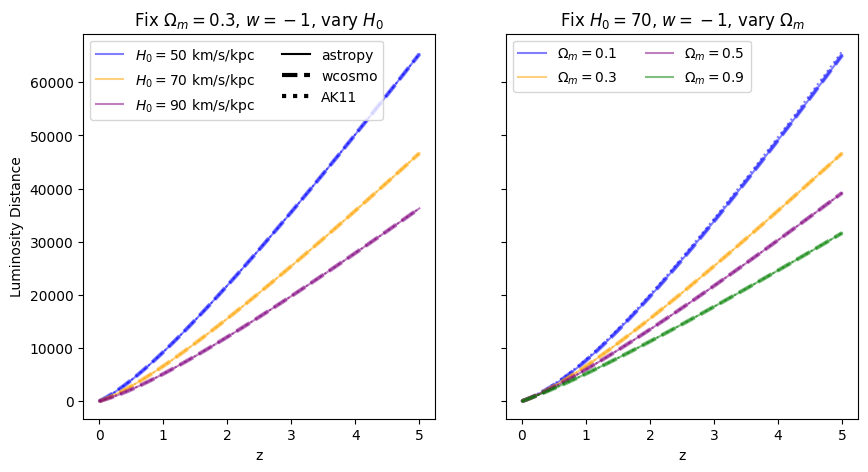

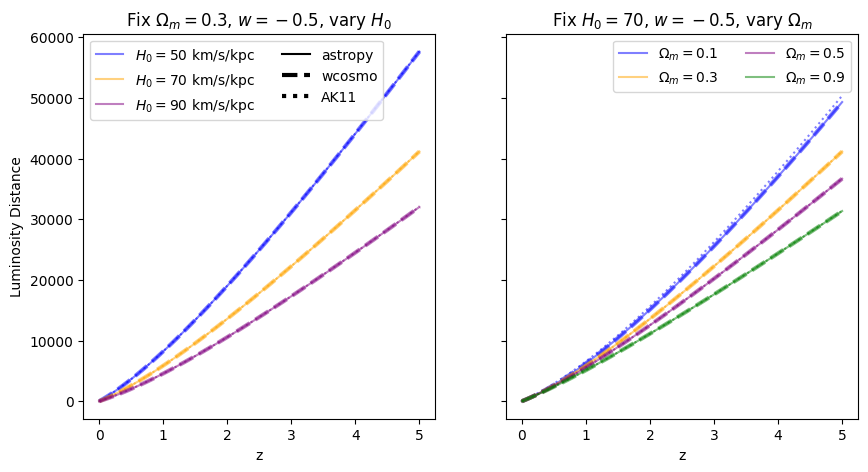

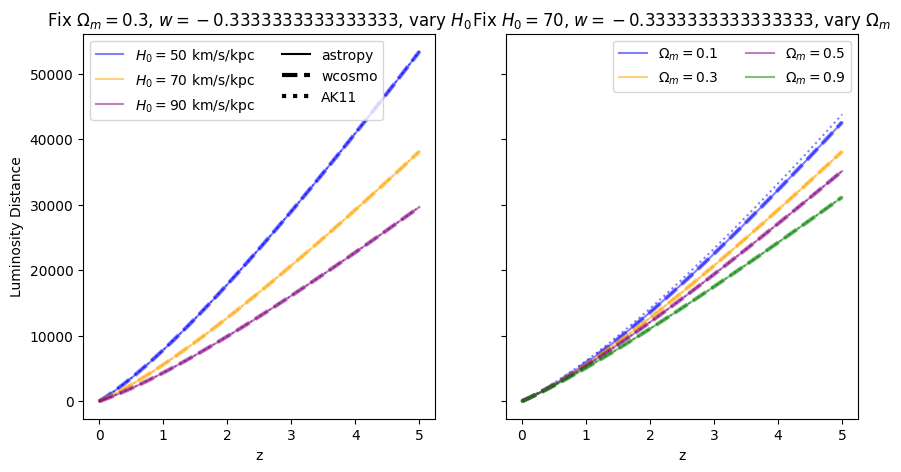

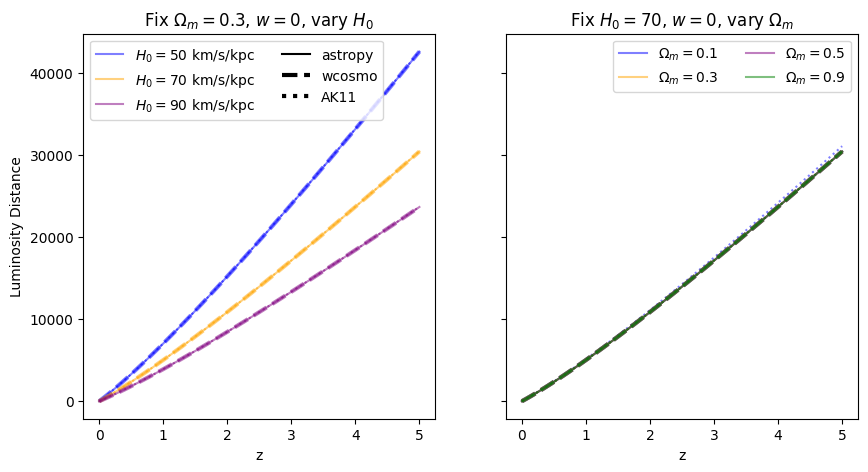

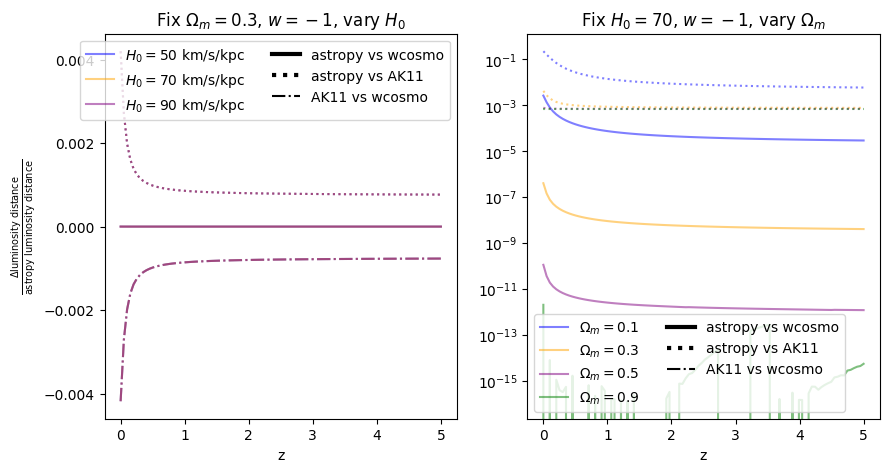

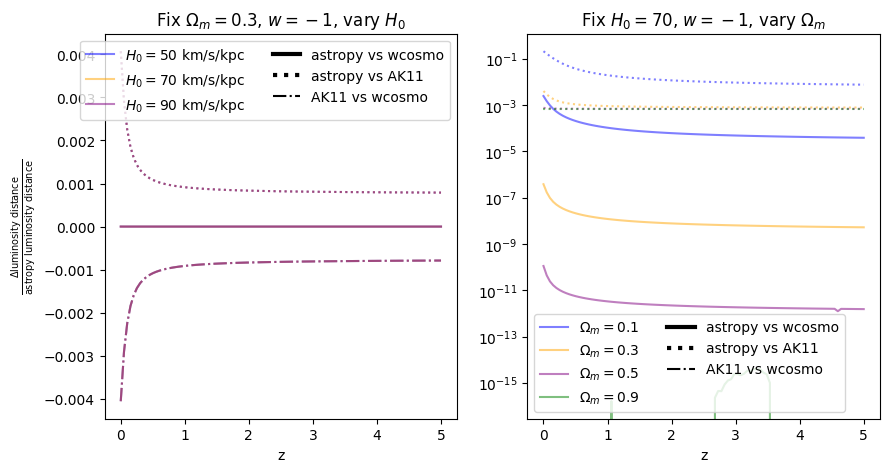

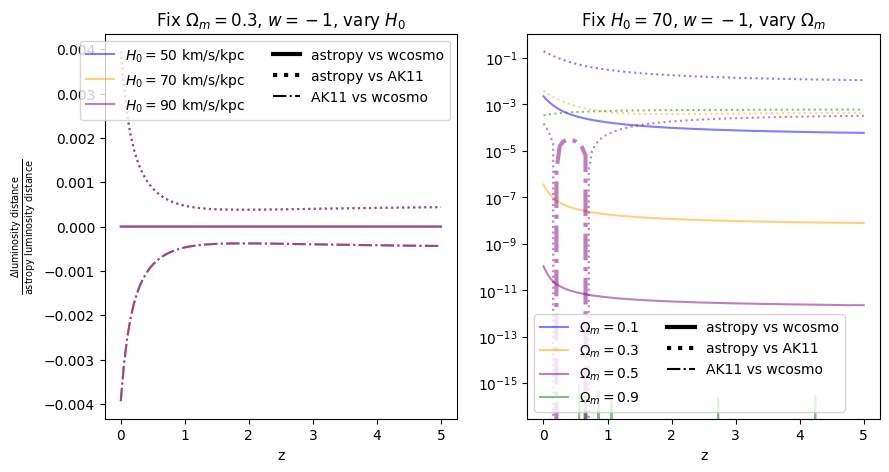

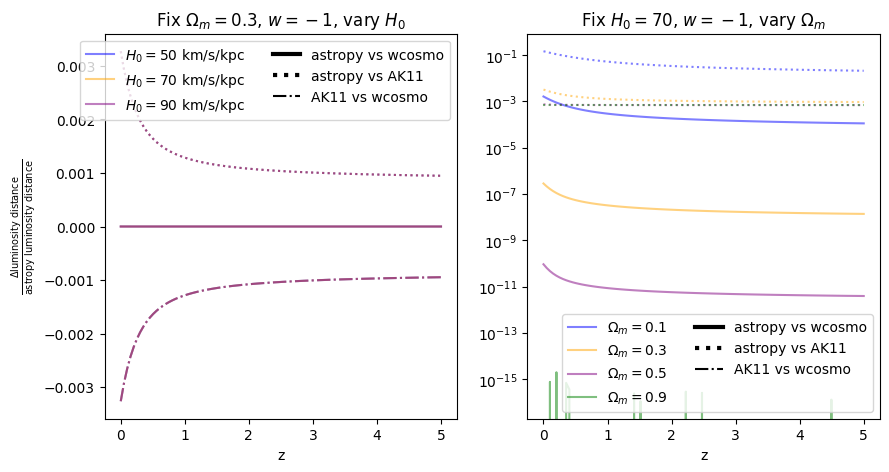

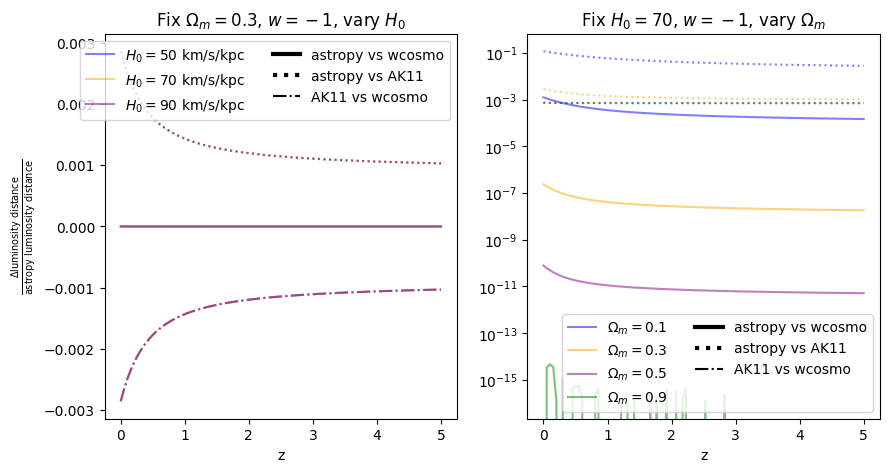

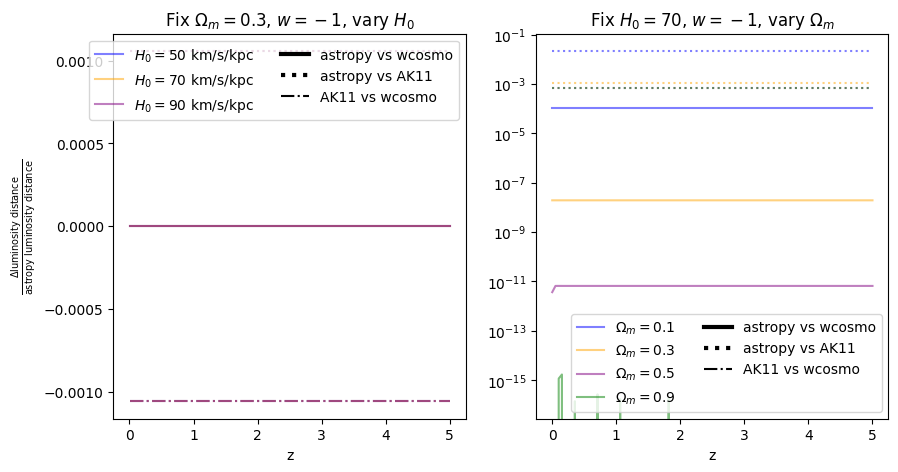

In [105]:
for w in w_vals:
    f=absolute_comparison_ak("luminosity_distance",w=w);
for w in w_vals:
    f=fractional_comparison_ak("luminosity_distance",w=w);

### $\frac{dV_c}{dz}$: differential comoving volume

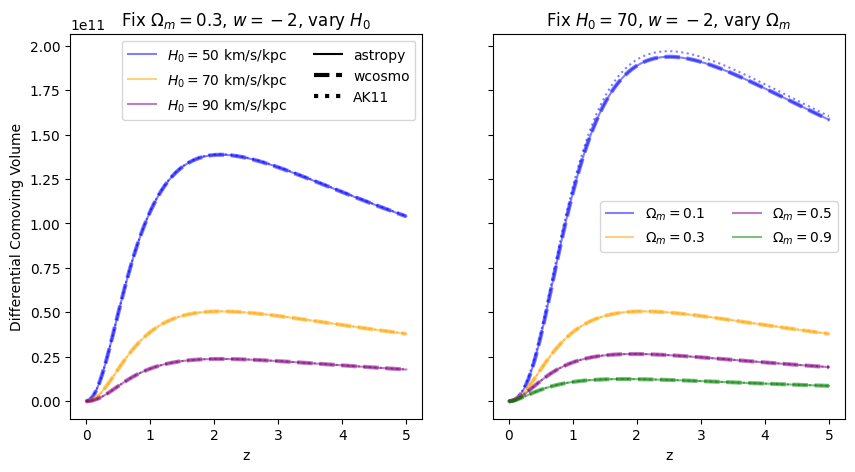

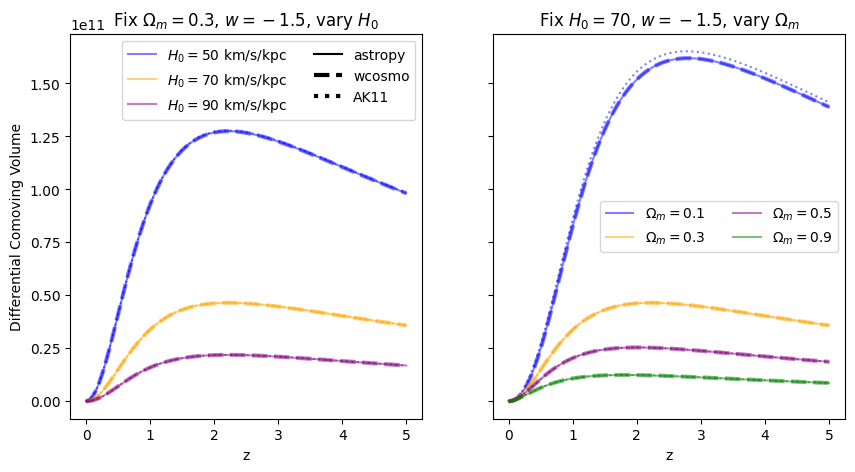

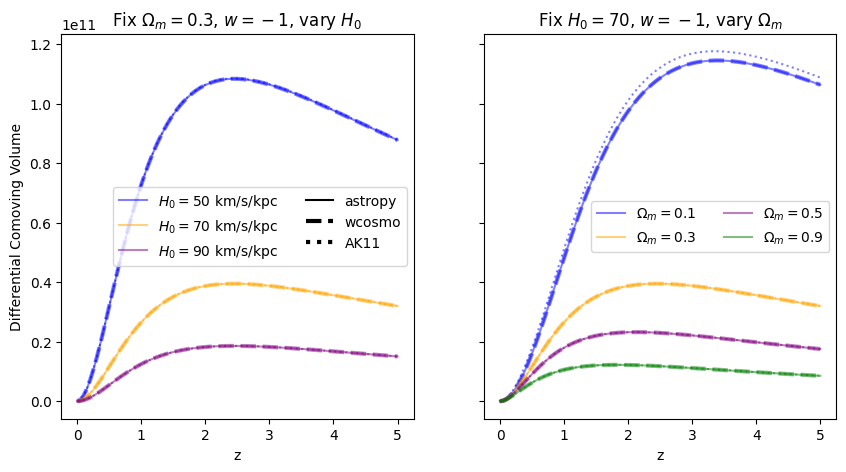

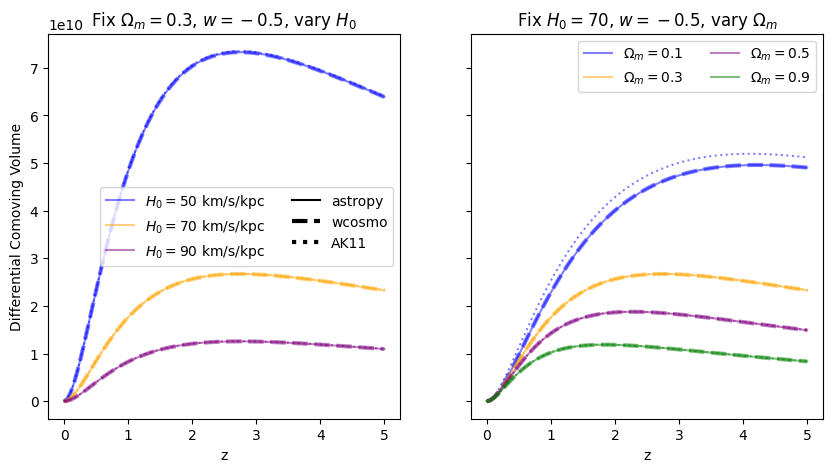

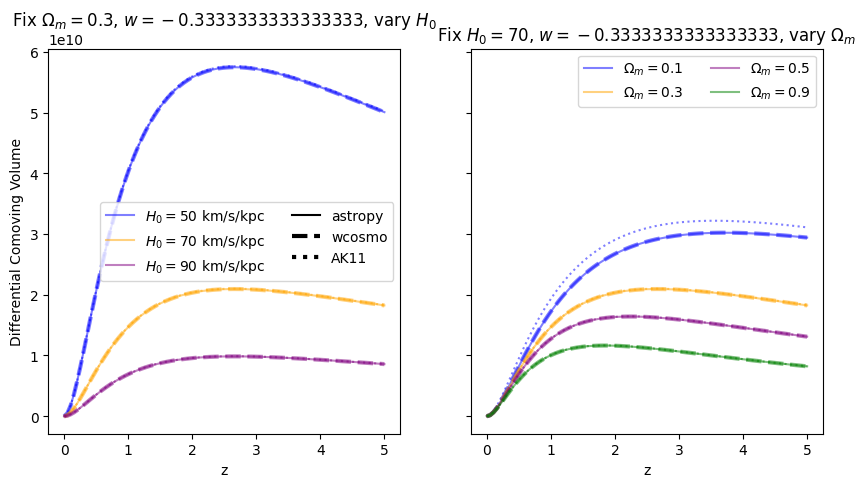

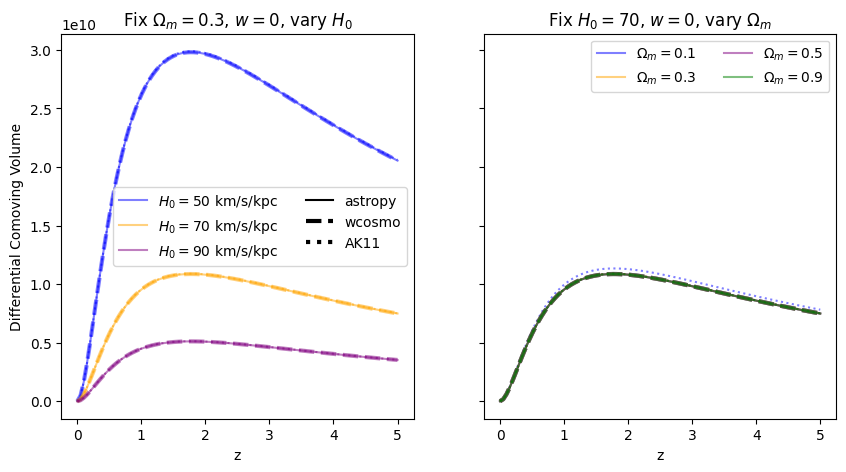

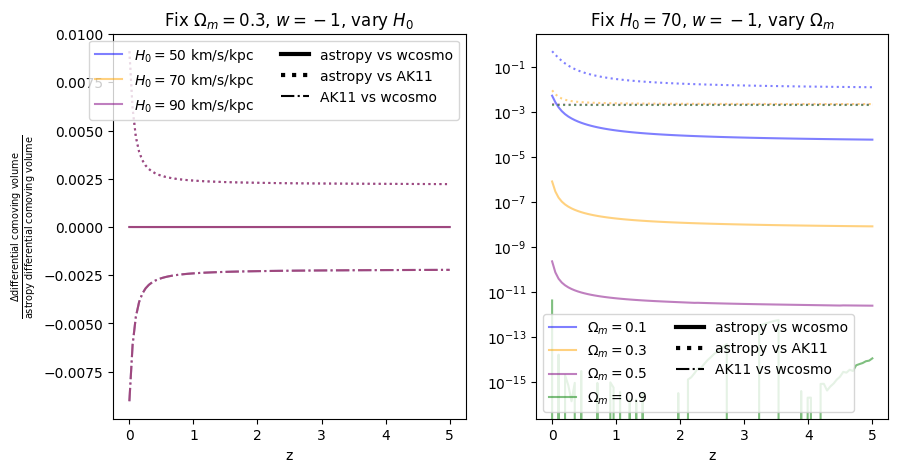

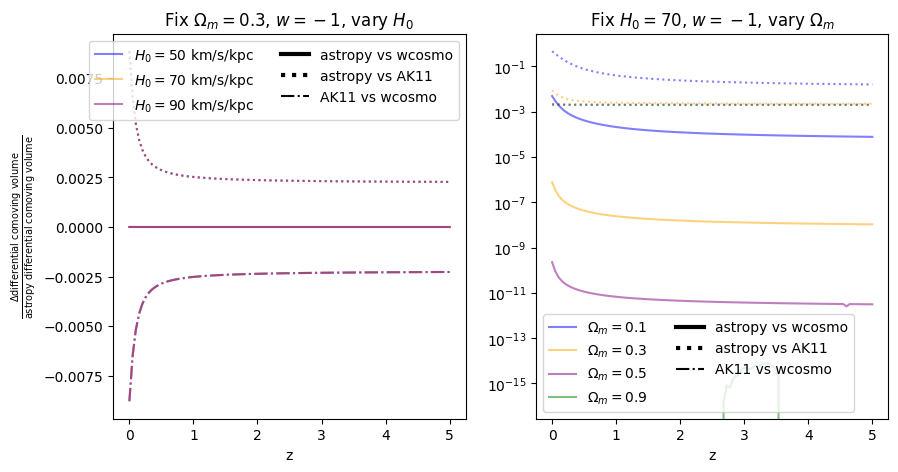

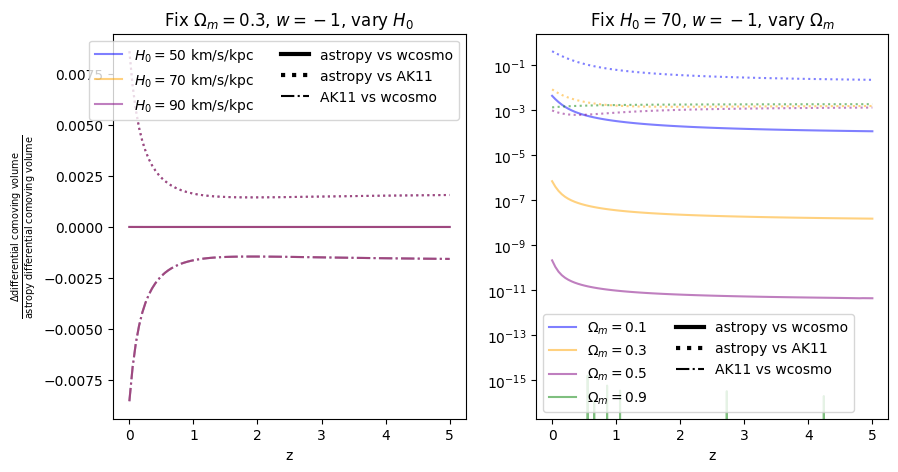

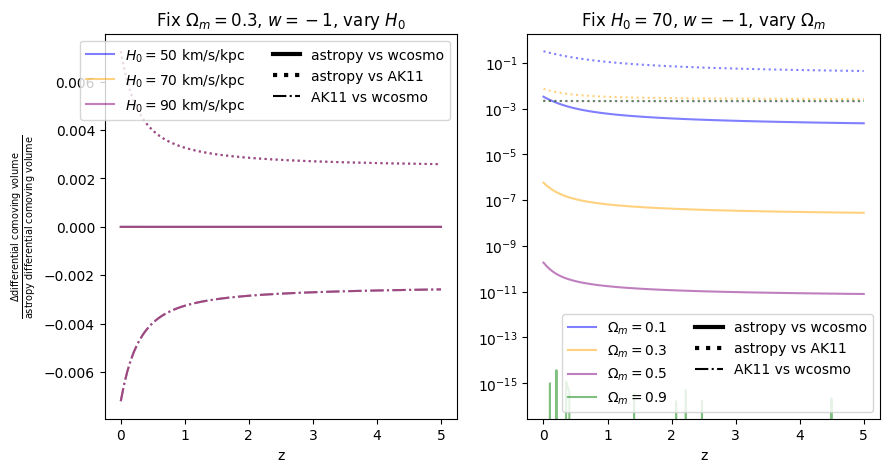

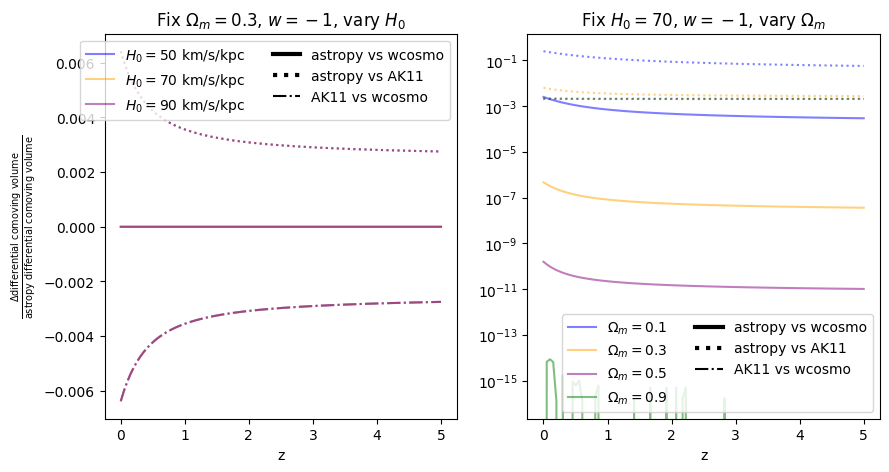

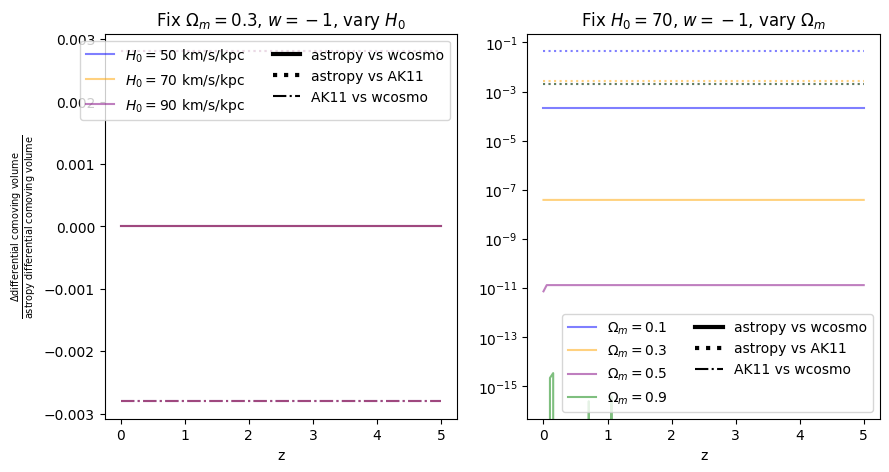

In [106]:
for w in w_vals:
    f=absolute_comparison_ak("differential_comoving_volume",w=w);
for w in w_vals:
    f=fractional_comparison_ak("differential_comoving_volume",w=w);

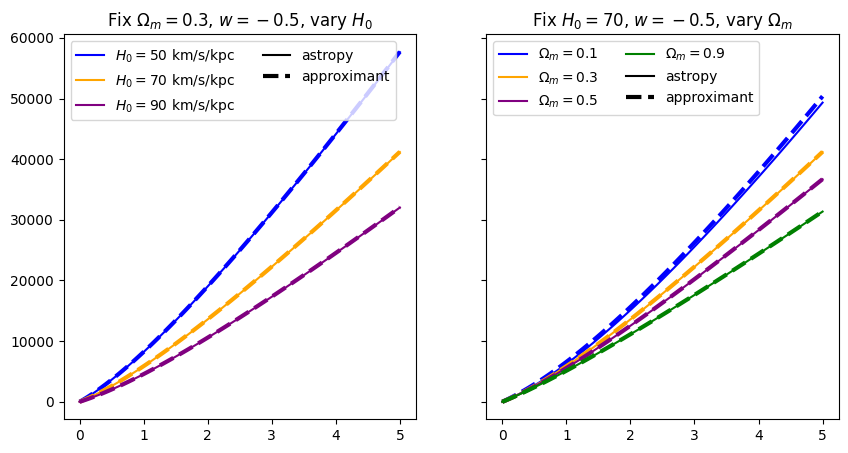

In [35]:
# first, check this approximation outside of wcosmo
fig, axes = plt.subplots(nrows=1,ncols=2,sharex=True,sharey=True,figsize=(10,5))
# axis 0: vary H0
w = -0.5
axes[0].set_title(f"Fix $\Omega_m=0.3$, $w={w}$, vary $H_0$")
for H0, c in zip(H0_vals,colors):
    axes[0].plot(z_arr,dL_approx_w(z_arr,H0,0.3,w=w),ls="--",lw=3,c=c)
    axes[0].plot(z_arr,FlatwCDM(H0=H0,Om0=0.3,w0=w).luminosity_distance(z_arr), c=c,label=f"$H_0=${H0} km/s/kpc")
axes[0].plot([],c='k',label="astropy")
axes[0].plot([],c='k',ls="--",lw=3,label="approximant")
axes[0].legend(ncol=2)

# axis 1: vary Om0
axes[1].set_title(f"Fix $H_0=70$, $w={w}$, vary $\Omega_m$")
for Om, c in zip(Om_vals,colors):
    axes[1].plot(z_arr,dL_approx_w(z_arr,70,Om,w=w),ls="--",lw=3,c=c)
    axes[1].plot(z_arr,FlatwCDM(H0=70,Om0=Om,w0=w).luminosity_distance(z_arr), c=c,label=f"$\Omega_m=${Om}")
axes[1].plot([],c='k',label="astropy")
axes[1].plot([],c='k',ls="--",lw=3,label="approximant")
axes[1].legend(ncol=2)

# Conclusions
The original approximant in Adachi & Kasai 2011 look very accurate when $\Omega_m \gtrsim 0.1$, so priors on $\Omega_m$ should exclude $\leq 0.1$ when using that approximant. When using the `wcosmo` approximant (which includes more terms), $\Omega_m \lesssim 0.1$ seems to look good!